In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delay-airports/new.csv
/kaggle/input/airport/airports.csv
/kaggle/input/arash-solgi/carriers.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
airlines=pd.read_csv("../input/delay-airports/new.csv")
airlines.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
0,2008,1,12,6,9E,87339E,3706,MLI,DTW,630,...,98.0,85.0,64.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,14,1,9E,80009E,3706,MLI,DTW,630,...,98.0,103.0,64.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,15,2,9E,87219E,3706,MLI,DTW,630,...,98.0,109.0,80.0,373.0,34.0,0.0,11.0,0.0,0.0,NaN
3,2008,1,16,3,9E,80019E,3706,MLI,DTW,630,...,98.0,104.0,62.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,17,4,9E,88009E,3706,MLI,DTW,630,...,98.0,105.0,72.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Number of the rows and columns
airlines.shape

(605765, 30)

In [5]:
#information about the dataset
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605765 entries, 0 to 605764
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 605765 non-null  int64  
 1   MONTH                605765 non-null  int64  
 2   DAY_OF_MONTH         605765 non-null  int64  
 3   DAY_OF_WEEK          605765 non-null  int64  
 4   OP_UNIQUE_CARRIER    605765 non-null  object 
 5   TAIL_NUM             595813 non-null  object 
 6   OP_CARRIER_FL_NUM    605765 non-null  int64  
 7   ORIGIN               605765 non-null  object 
 8   DEST                 605765 non-null  object 
 9   CRS_DEP_TIME         605765 non-null  int64  
 10  DEP_TIME             588457 non-null  float64
 11  DEP_DELAY            588457 non-null  float64
 12  TAXI_OUT             588457 non-null  float64
 13  TAXI_IN              587130 non-null  float64
 14  CRS_ARR_TIME         605765 non-null  int64  
 15  ARR_TIME         

# we want to expalin each of the attributes for first dataset(airlines)
1. 1-Year
1. 2-Month
1. 3-Day Of Month
1. 4-Unique Carrier Code
1. 5-Tail Number
1. 6-Flight Number
1. 7-Origin Airport
1. 8-Destination Airport
1. 9-CRS Departure Time (local time: hhmm)
1. 10-Actual Departure Time (local time: hhmm)
1. 11-Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
1. 12-Taxi Out Time, in Minutes
1. 13-Taxi IN Time, in Minutes
1. 14-CRS Arrival Time (local time: hhmm)
1. 15-Actual Arrival Time (local time: hhmm)
1. 16-Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
1. 17-Cancelled Flight Indicator (1=Yes)		
1. 18-Specifies The Reason For Cancellation		
1. 19-Diverted Flight Indicator (1=Yes)		
1. 20-CRS Elapsed Time of Flight, in Minutes		
1. 21-Elapsed Time of Flight, in Minutes		
1. 22-Flight Time, in Minutes
1. 23-Distance between airports (miles)		
1. 24-Carrier Delay, in Minutes
1. 25-Weather Delay, in Minutes
1. 26-National Air System Delay, in Minutes
1. 27-Security Delay, in Minutes
1. 28-Late Aircraft Delay, in Minutes

*  After we define the datas, we have to make sure for zero value or lost data

In [6]:
# Replace using median 
median = airlines['DEP_TIME'].median()
airlines['DEP_TIME'].fillna(median, inplace=True)
median = airlines['DEP_DELAY'].median()
airlines['DEP_DELAY'].fillna(median, inplace=True)
median = airlines['TAXI_OUT'].median()
airlines['TAXI_OUT'].fillna(median, inplace=True)
median = airlines['TAXI_IN'].median()
airlines['TAXI_IN'].fillna(median, inplace=True)
median = airlines['ARR_TIME'].median()
airlines['ARR_TIME'].fillna(median, inplace=True)
median = airlines['ARR_DELAY'].median()
airlines['ARR_DELAY'].fillna(median, inplace=True)
median = airlines['ARR_DELAY'].median()
airlines['ARR_DELAY'].fillna(median, inplace=True)
median = airlines['CRS_ELAPSED_TIME'].median()
airlines['CRS_ELAPSED_TIME'].fillna(median, inplace=True)
median = airlines['ACTUAL_ELAPSED_TIME'].median()
airlines['ACTUAL_ELAPSED_TIME'].fillna(median, inplace=True)
median = airlines['AIR_TIME'].median()
airlines['AIR_TIME'].fillna(median, inplace=True)
median = airlines['AIR_TIME'].median()
airlines['AIR_TIME'].fillna(median, inplace=True)
median = airlines['LATE_AIRCRAFT_DELAY'].median()
airlines['LATE_AIRCRAFT_DELAY'].fillna(median, inplace=True)
median = airlines['SECURITY_DELAY'].median()
airlines['SECURITY_DELAY'].fillna(median, inplace=True)
median = airlines['NAS_DELAY'].median()
airlines['NAS_DELAY'].fillna(median, inplace=True)
median = airlines['CARRIER_DELAY'].median()
airlines['CARRIER_DELAY'].fillna(median, inplace=True)

In [7]:
airlines.isnull().sum()

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                 9952
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE      588457
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY          456958
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
Unnamed: 29            605765
dtype: int64

*  we can transform the NAN-data to the value "0.0" because there was no impact on the flight that causes a delay. Null values have now decreased Drastically. There are only a few attributes left.

In [8]:
airlines['WEATHER_DELAY'] =airlines['WEATHER_DELAY'].fillna(0)
airlines['TAIL_NUM'] =airlines['TAIL_NUM'].fillna(0)
airlines['CANCELLATION_CODE'] =airlines['CANCELLATION_CODE'].fillna('D')

In [9]:
airlines.isnull().sum()

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                    0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE           0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY               0
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
Unnamed: 29            605765
dtype: int64

In [10]:
# Reason why you cancel your flight
airlines['CANCELLATION_CODE'].value_counts()
#"A","Carrier"
#"B","Security"
#"C","National Air System"
#"D","Weather"

D    588457
B      6711
A      6635
C      3962
Name: CANCELLATION_CODE, dtype: int64

In [11]:
airlines.isnull().sum()

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                    0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE           0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY               0
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
Unnamed: 29            605765
dtype: int64

* After the the cleaning the first data set, we have to figure out how can impact of the delay with carriers and airport data and we want to join into the first one.

In [12]:
airports=pd.read_csv('../input/airport/airports.csv')
airports

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [13]:
carriers=pd.read_csv('../input/arash-solgi/carriers.csv')
carriers
#the code with the name of the airlines

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1486,ZW,Air Wisconsin Airlines Corp
1487,ZX,Air Georgian
1488,ZX (1),Airbc Ltd.
1489,ZY,Atlantic Gulf Airlines


In [14]:
# when we have cancellation and the distaces between two airports is more than 4000 meter(only Atlanta )
airlines[(airlines['CANCELLED']==1)& (airlines['DISTANCE']>4000)]

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
352189,2008,1,27,7,DL,N832MH,1282,HNL,ATL,1635,...,512.0,111.0,86.0,4502.0,0.0,0.0,5.0,0.0,0.0,NaN


In [15]:
# we use the groupby with sum, count and delay part for ARR_DELAY with Destination
airlines_grouped_sum = airlines.groupby('DEST', as_index= False)['ARR_DELAY'].agg('sum').rename(columns={"ARR_DELAY":"ARR_DELAY_SUM"})
airlines_grouped_cnt = airlines.groupby('DEST', as_index= False)['ARR_DELAY'].agg('count').rename(columns={"ARR_DELAY":"ARR_DELAY_CNT"})
# Merge the two groups together
airlines_grouped_delay = airlines_grouped_sum.merge(airlines_grouped_cnt, left_on='DEST', right_on='DEST', how='inner')

# Calculate the average delay per destination
airlines_grouped_delay.loc[:,'AVG_ARR_DELAY'] = airlines_grouped_delay['ARR_DELAY_SUM'] /airlines_grouped_delay['ARR_DELAY_CNT']

airlines_grouped_delay.sort_values('ARR_DELAY_SUM', ascending=False)

,DEST,ARR_DELAY_SUM,ARR_DELAY_CNT,AVG_ARR_DELAY
199,ORD,838358.0,29936,28.005011
244,SFO,387248.0,11560,33.498962
148,LAX,257506.0,18964,13.578675
78,DFW,211761.0,23874,8.869942
16,ATL,208002.0,33881,6.139193
...,...,...,...,...
66,CPR,-219.0,301,-0.727575
216,PSE,-305.0,109,-2.798165
194,OGG,-1510.0,2078,-0.726660
136,ITO,-1866.0,786,-2.374046


* In conclusion, ABE has the smallest average of delay in the destination(AVG_ARR_DELAY==-6.29032). On the other hand , YUM Destination has a lot of huge delays in single flights which effects the total delay of the airline, (alomost AVG_ARR_DELAY ==64.7294 and for sum is 838358.I used max and min in the last piece of code to figure out

In [16]:
# we use filter with diverted (yes=1)and when  Distance between airports is less than 300(miles)
airlines[(airlines['DIVERTED']==1)& (airlines['DISTANCE']<300)]

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
1496,2008,1,30,3,9E,88369E,3756,DTW,BUF,1013,...,111.0,111.0,86.0,240.0,0.0,0.0,5.0,0.0,0.0,NaN
5777,2008,1,27,7,9E,89649E,5955,SGF,MEM,640,...,111.0,111.0,86.0,243.0,0.0,0.0,5.0,0.0,0.0,NaN
6149,2008,1,26,6,9E,84779E,5965,MEM,XNA,1935,...,111.0,111.0,86.0,258.0,0.0,0.0,5.0,0.0,0.0,NaN
34753,2008,1,10,4,MQ,N323AE,3011,LAX,FAT,815,...,74.0,111.0,86.0,209.0,0.0,0.0,5.0,0.0,0.0,NaN
34791,2008,1,15,2,MQ,N240DS,3013,LAX,FAT,1000,...,47.0,111.0,86.0,209.0,0.0,0.0,5.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596168,2008,1,31,4,WN,N340LV,1330,STL,MDW,1225,...,60.0,111.0,86.0,251.0,0.0,0.0,5.0,0.0,0.0,NaN
597045,2008,1,29,2,XE,N13550,125,SAN,ONT,2136,...,20.0,111.0,86.0,94.0,0.0,0.0,5.0,0.0,0.0,NaN
598415,2008,1,5,6,XE,N12163,224,SAT,AUS,1655,...,17.0,111.0,86.0,66.0,0.0,0.0,5.0,0.0,0.0,NaN
599283,2008,1,24,4,XE,N14204,321,TUL,OKC,1835,...,25.0,111.0,86.0,111.0,0.0,0.0,5.0,0.0,0.0,NaN


In [17]:
airlines['DIVERTED'].unique()
DIVERTED_CANCELLATION_CODE=pd.crosstab(airlines['DIVERTED'],airlines['CANCELLATION_CODE'])
DIVERTED_CANCELLATION_CODE
# As you see, if the Diverted Flight Indicator is 1=yes, the reason for cancellation is weather

CANCELLATION_CODE,A,B,C,D
DIVERTED,,,,
0.0,6635,6711,3962,587130
1.0,0,0,0,1327


# # Visualizations (scatter plot, bar graph, histogram, boxplot, subplot, pie chart, heatmap)

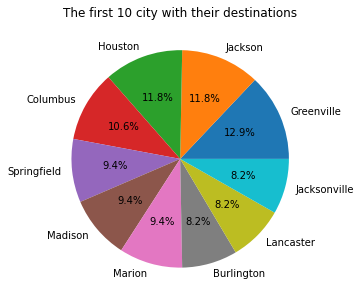

In [18]:
# categorized the countries
plt.rcParams['figure.figsize']=(10,5)
airports['city'].value_counts().sort_values(ascending=False).head(10).plot.pie(y='city',autopct="%0.1f%%")
plt.title('The first 10 city with their destinations')
plt.axis('off')
plt.show()
#the Greenville has the high most of amount destination(percantage)

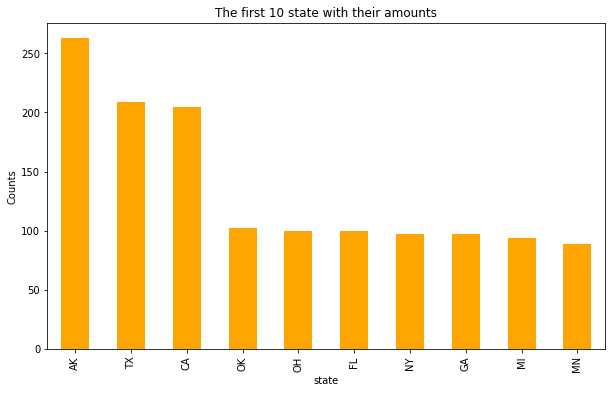

In [19]:
plt.rcParams['figure.figsize']=(10,6)
airports['state'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='orange')
plt.title('The first 10 state with their amounts')
plt.xlabel('state')
plt.ylabel('Counts')
plt.show()

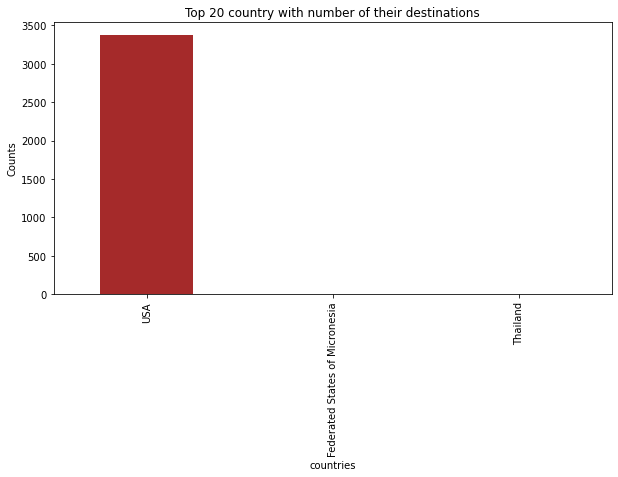

In [20]:
#Top 20 companies with most number of jobs
plt.rcParams['figure.figsize']=(10,5)
airports['country'].value_counts().sort_values(ascending=False).head(3).plot.bar(color='brown')
plt.title('Top 20 country with number of their destinations')
plt.xlabel('countries')
plt.ylabel('Counts')
plt.show()

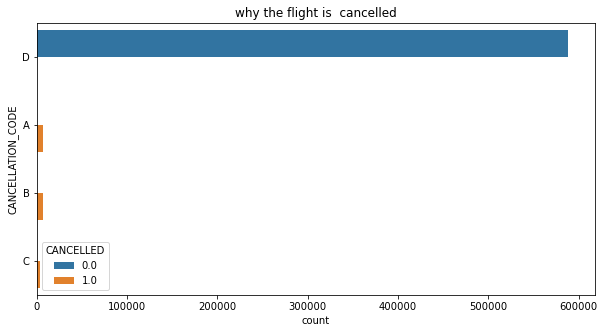

<Figure size 720x360 with 0 Axes>

In [21]:
sns.countplot(data=airlines,y='CANCELLATION_CODE',hue='CANCELLED')
plt.title('why the flight is  cancelled')
plt.figure(figsize=(10,5))
plt.show()
# it shows the weather is the main reason for cancellation when is (zero)

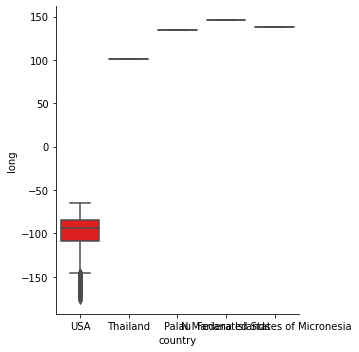

In [22]:
sns.catplot('country','long',data=airports,kind='box', color='red')
# the US has the most longitude of the airport

(array([5.69975e+05, 3.34750e+04, 1.99800e+03, 2.11000e+02, 5.10000e+01,
        3.20000e+01, 1.40000e+01, 7.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ -91. ,   70.6,  232.2,  393.8,  555.4,  717. ,  878.6, 1040.2,
        1201.8, 1363.4, 1525. ]),
 <a list of 10 Patch objects>)

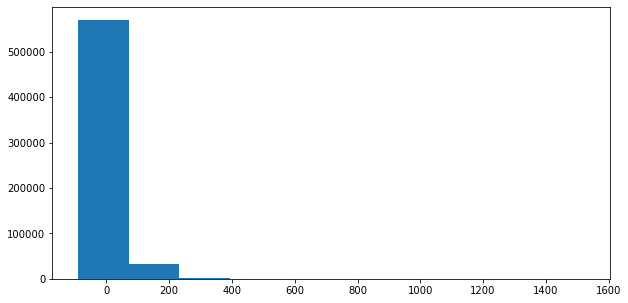

In [23]:
plt.hist(airlines['ARR_DELAY'])
#Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.(between lower than zero until 200(almost)).

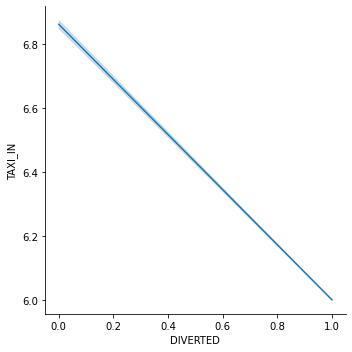

In [24]:
sns.relplot('DIVERTED','TAXI_IN',data=airlines,kind='line')

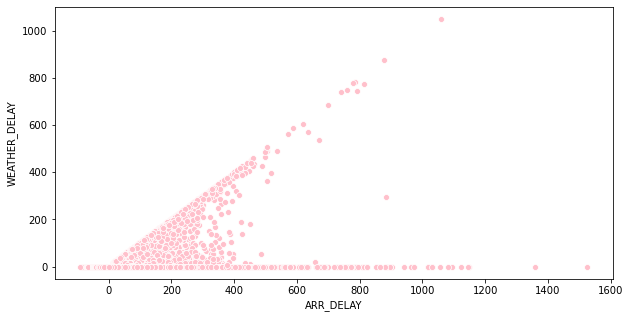

In [25]:
sns.scatterplot(x='ARR_DELAY',y='WEATHER_DELAY',
        data=airlines,color='pink')
#we figure out the most the Actual Arrival Time for weather delay is between zero and 400(hhmm)

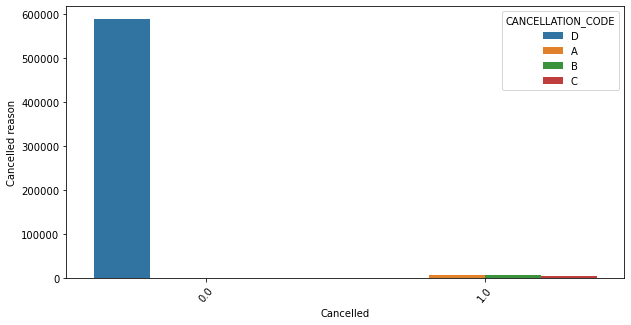

In [26]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(airlines['CANCELLED'],hue=airlines['CANCELLATION_CODE'],ax=ax)
plt.xlabel('Cancelled')
plt.ylabel('Cancelled reason')
plt.xticks(rotation=50)
plt.show()
#it is clear that the weather has the main portion for cancelling the flight

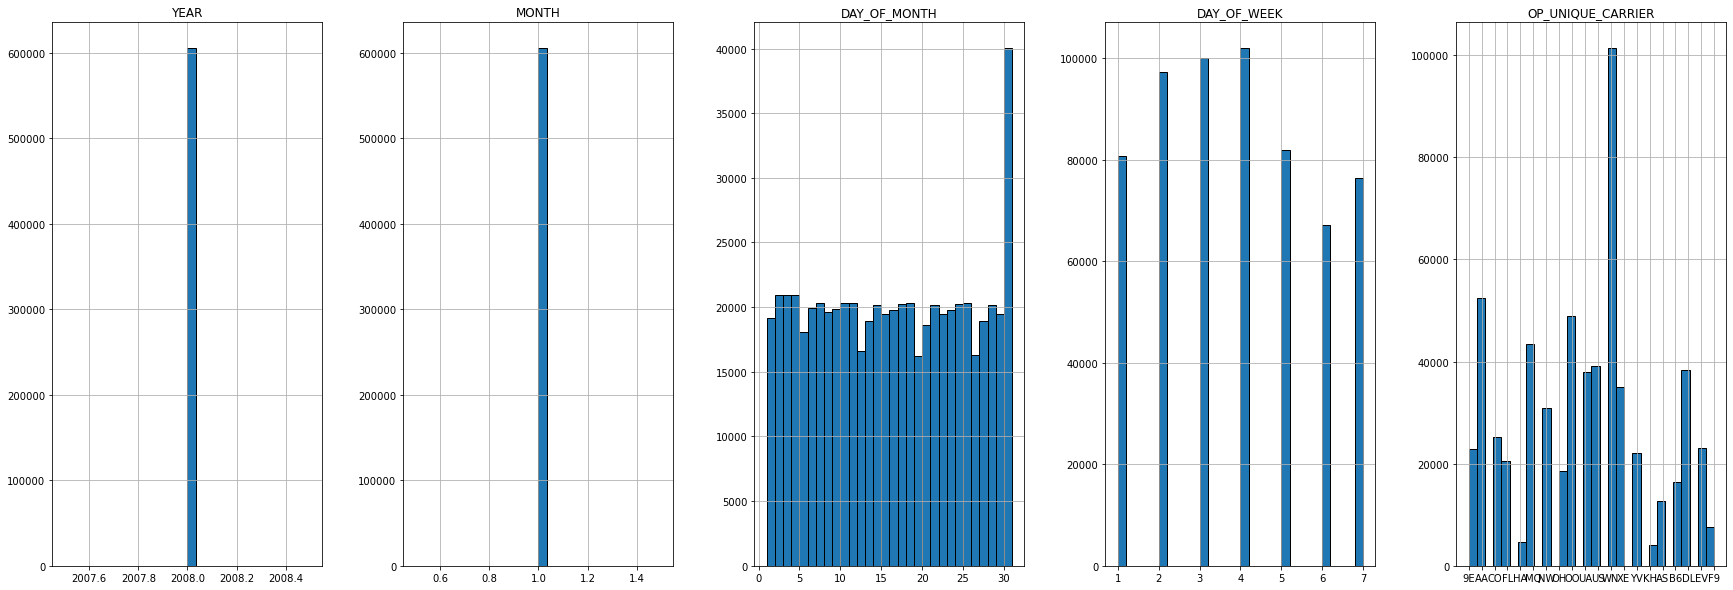

In [27]:
# abundance for each of the columns
import itertools
columns=airlines.columns[:5]
plt.subplots(figsize=(30,28))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),5,j+1)
    plt.subplots_adjust(wspace=0.3,hspace=0.8)
    airlines[i].hist(bins=30,edgecolor='black')
    plt.title(i)
plt.show()

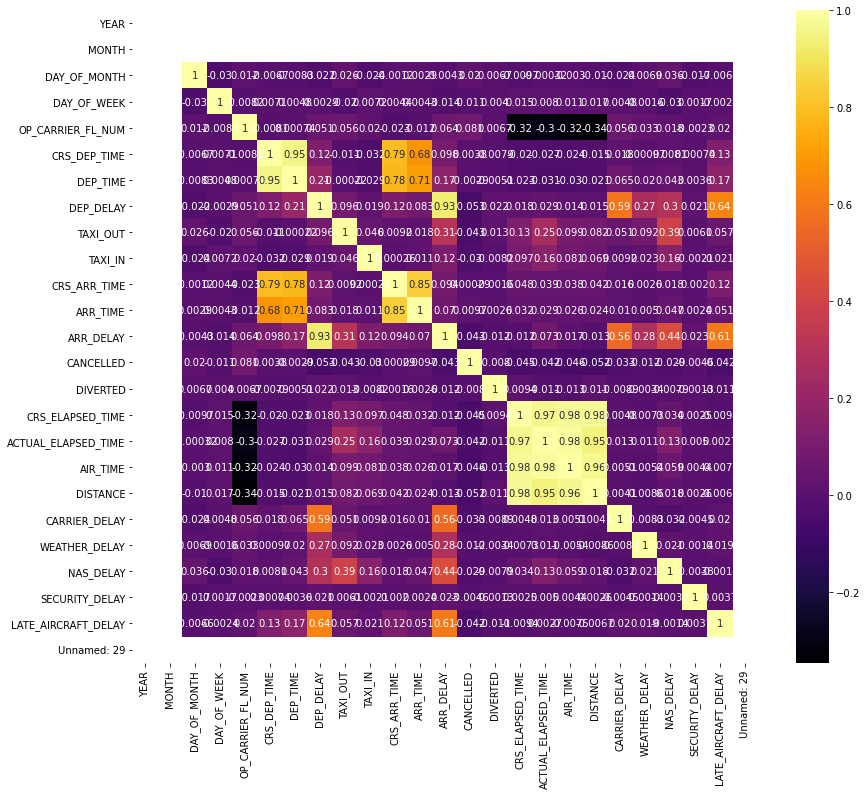

In [28]:
# Dataframe correlation
del_corr = airlines.corr()

# figure
f, ax = plt.subplots(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(del_corr,annot=True,cmap='inferno')
plt.show()

* we have 2 correlation: positive (more then .6 ) and negative (less than .6 and higher than .2)
* Positive correlations between:
* DEPARTURE_DELAY and
* CARRIER_DELAY
* LATE_AIRCRAFT_DELAY
* ARRIVAL_DELAY and
* DEPARTURE_DELAY
* LATE_AIRCRAFT_DELAY

* Negative correlation between:
* ARRIVAL_DELAY and
* NAS_DELAY
* WEATHER_DELAY
* DEPARTURE_DELAY and
* NAS_DELAY
* WEATHER_DELAY
* TAXI_OUT and
* ELAPSED_TIME

In [29]:
# Marking the delayed flights
airlines['DELAYED'] = airlines.loc[:,'ARR_DELAY'].values > 0

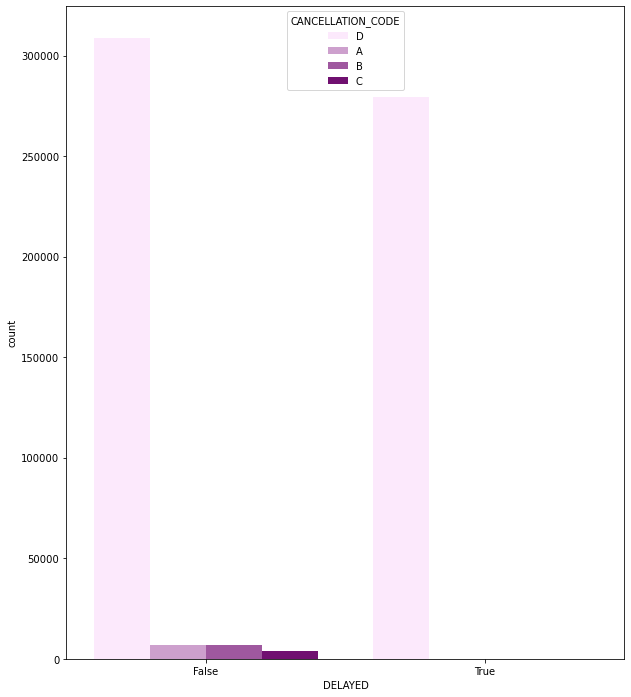

In [30]:
figsize=plt.subplots(figsize=(10,12))
sns.countplot(x='DELAYED',hue='CANCELLATION_CODE',data=airlines,color='purple')
plt.show()
#The most cancellation portion is for weather problem when we have delay also and not

* In this part, we want to know which part of delay has the most portion (1-Carrier Delay in Minutes,2-Weather Delay in Minutes,3-National Air System Delay in Minutes,4-SecurityDelay in Minutes,5-Late Aircraft Delay, in Minutes)

In [31]:
# Label definition
y = airlines.DELAYED

# Choosing the predictors
feature_list_s = [
    'LATE_AIRCRAFT_DELAY'
    ,'CARRIER_DELAY'
    ,'NAS_DELAY'
    ,'WEATHER_DELAY'
    ,'ACTUAL_ELAPSED_TIME']

# New dataframe based on a small feature list
df = airlines[feature_list_s]

In [32]:
from sklearn import metrics 
from sklearn.metrics import roc_auc_score,precision_score,recall_score,auc,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
clf = RandomForestClassifier(n_estimators = 10, random_state=32) 
clf.fit(df, y)

RandomForestClassifier(n_estimators=10, random_state=32)

In [34]:
importances=clf.feature_importances_
importances=pd.DataFrame([df.columns,importances]).transpose()
importances.columns=[['Variables','crucial']]
importances
# we can see the NAS DELAY has the highest portion that has been delayed.

,Variables,crucial
0,LATE_AIRCRAFT_DELAY,0.17598
1,CARRIER_DELAY,0.14784
2,NAS_DELAY,0.608264
3,WEATHER_DELAY,0.0104089
4,ACTUAL_ELAPSED_TIME,0.0575071


# we want to make models with (Naïve Bayes, Logistic Regression, Decision Tree,Random Forest, Gradient Boosting and SVM)

* we are going to trian and test the model and should define the x and y

In [35]:
# choosing the predictors
feature_list = [
    'YEAR'
    ,'MONTH'
    ,'LATE_AIRCRAFT_DELAY'
    ,'ARR_DELAY'
    ,'NAS_DELAY'
    ,'WEATHER_DELAY'
    ,'ACTUAL_ELAPSED_TIME'
    ,'DEP_DELAY'
    ,'CARRIER_DELAY'
    ,'AIR_TIME'
    ,'DISTANCE'
    ,'TAXI_IN'
    ,'TAXI_OUT'
    ,'DAY_OF_WEEK'
    ,'SECURITY_DELAY'
    ,'CRS_ARR_TIME'
    ,'CANCELLED'
    ,'DEP_TIME'
]

    
airlines_1=airlines.sample(n=50000)
X = airlines_1[feature_list]

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 298719 to 542168
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 50000 non-null  int64  
 1   MONTH                50000 non-null  int64  
 2   LATE_AIRCRAFT_DELAY  50000 non-null  float64
 3   ARR_DELAY            50000 non-null  float64
 4   NAS_DELAY            50000 non-null  float64
 5   WEATHER_DELAY        50000 non-null  float64
 6   ACTUAL_ELAPSED_TIME  50000 non-null  float64
 7   DEP_DELAY            50000 non-null  float64
 8   CARRIER_DELAY        50000 non-null  float64
 9   AIR_TIME             50000 non-null  float64
 10  DISTANCE             50000 non-null  float64
 11  TAXI_IN              50000 non-null  float64
 12  TAXI_OUT             50000 non-null  float64
 13  DAY_OF_WEEK          50000 non-null  int64  
 14  SECURITY_DELAY       50000 non-null  float64
 15  CRS_ARR_TIME         50000 non

In [37]:
y = airlines_1.DELAYED

In [38]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=153)
from sklearn.preprocessing import scale
X_train=scale(X_train)
X_test=scale(X_test)

# Linear Regression model

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model=model.fit(X_train,y_train)
slope=model.coef_
coef=model.intercept_
print(slope.flatten())
print(coef)

[ 0.00000000e+00  0.00000000e+00  1.18977981e-02  3.94388404e+01
  1.12010205e-02  1.93509675e-02  9.81992869e-02  6.98331003e-02
 -1.45401677e-02  2.76099008e-01 -3.63597215e-01  2.65002469e-02
  1.00026907e-01 -3.69843736e-03 -5.78758406e-03 -1.51196964e-02
 -1.32730374e+00  3.78684672e-02]
[9.30151917]


In [40]:
predictions=model.predict(X_test)
predictions

array([ True, False,  True, ..., False,  True,  True])

In [41]:
score=accuracy_score(y_test,predictions)
score

0.9997

* SelectKBest and RFE for feature selections

* Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.
RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

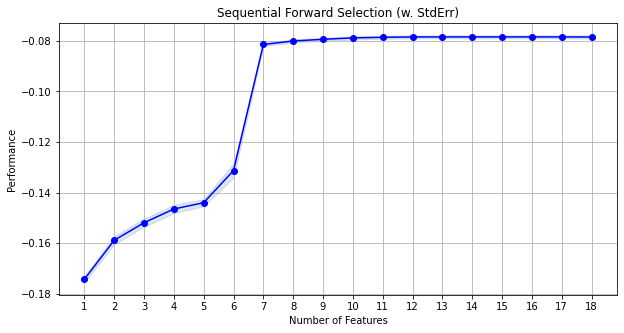

In [43]:
model_second = LinearRegression()
sfs = SFS(model_second, k_features='best', forward=True, floating=False, 
          scoring='neg_mean_squared_error', cv=20)
model = sfs.fit(X_train, y_train)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [44]:
print('Selected features:', sfs.k_feature_idx_)
##as you see, all features are important(all columns) when want to train all models with the best accuracy.

Selected features: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17)


# Gaussian Naive Bayes model

In [45]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB


#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

GaussianNB()

In [46]:
predictions=model.predict(X_test)
predictions

array([ True, False,  True, ...,  True,  True,  True])

In [47]:
score=accuracy_score(y_test,predictions)
score

0.4915

# Support Vector Machine model

In [48]:
model=SVC()

In [49]:
model.fit(X_train,y_train)

SVC()

In [50]:
predictions=model.predict(X_test)
predictions

array([ True, False,  True, ..., False,  True,  True])

In [51]:
score=accuracy_score(y_test,predictions)
score

0.9896

# Decision Tree model

In [52]:
model=DecisionTreeClassifier()

In [53]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
predictions=model.predict(X_test)
predictions

array([ True, False,  True, ..., False,  True,  True])

In [55]:
score=accuracy_score(y_test,predictions)
score

1.0

# GradientBoostingClassifier model

In [56]:
model=GradientBoostingClassifier()

In [57]:
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [58]:
predictions=model.predict(X_test)
predictions

array([ True, False,  True, ..., False,  True,  True])

In [59]:
score=accuracy_score(y_test,predictions)
score

1.0